In [1]:
! conda env list

# conda environments:
#
                         /g/data/gv90/as2285/miniconda3
                         /g/data/gv90/as2285/miniconda3/envs/sea-ice-extremes
                         /g/data/gv90/as2285/miniconda3/envs/sea-ice-plots
                         /g/data/gv90/as2285/miniconda3/envs/sea-ice-tracker
base                  *  /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01
cice                     /scratch/tm70/as2285/conda/envs/cice
icepack                  /scratch/tm70/as2285/conda/envs/icepack
payu                     /scratch/tm70/as2285/conda/envs/payu



In [2]:
import intake
from dask.distributed import Client
import xarray as xr

In [19]:
client = Client(threads_per_worker=1)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42551 instead
  warnings.warn(


In [20]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/42551/status,
Dashboard: /proxy/42551/status,Workers: 12
Total threads: 12,Total memory: 46.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46033,Workers: 12
Dashboard: /proxy/42551/status,Total threads: 12
Started: Just now,Total memory: 46.00 GiB
Comm: tcp://127.0.0.1:39327,Total threads: 1
Dashboard: /proxy/35637/status,Memory: 3.83 GiB
Nanny: tcp://127.0.0.1:39573,


Open the catalog

In [5]:
catalog = intake.cat.access_nri

In [6]:
catalog.search(model="ACCESS-CM2")

,model,description,realm,frequency,variable
name,,,,,
bx944,{ACCESS-CM2},"{Standard CMIP6 historical simulation, control experiment for by473 pacemaker experiment (948d8676-2c56-49db-8ea1-b80572b074c8)}","{seaIce, atmos, ocean}","{1day, 1mon}","{temp_yflux_adv, fld_s38i441, fld_s30i298, fld_s03i296, temp_surface_ave, temp_yflux_sigma, salt_sweby_advec, frz_onset, fld_s00i010, fld_s34i107, power_waves, fld_s03i815, fld_s34i071, temp_xflux..."
by473,{ACCESS-CM2},"{Pacemaker variation of CMIP6 historical simulation, Topical Atlantic region replaced with fixed SSTs from observations}","{seaIce, atmos, ocean}","{1day, 1mon}","{temp_yflux_adv, fld_s38i441, fld_s30i298, fld_s03i296, temp_surface_ave, temp_yflux_sigma, salt_sweby_advec, frz_onset, fld_s00i010, fld_s34i107, power_waves, fld_s03i815, fld_s34i071, temp_xflux..."
by578,{ACCESS-CM2},{Pacemaker variation of CMIP6 ssp245 simulation with Tropical Atlantic region replaced with fixed SSTs from observations},"{seaIce, atmos, ocean}","{1day, 1mon}","{temp_yflux_adv, fld_s38i441, fld_s30i298, fld_s03i296, temp_surface_ave, temp_yflux_sigma, salt_sweby_advec, frz_onset, fld_s00i010, fld_s34i107, power_waves, fld_s03i815, fld_s34i071, temp_xflux..."
by647,{ACCESS-CM2},"{Standard CMIP6 ssp245 simulation, control experiment for by578 pacemaker experiment (1fd9e682-d393-4b17-a9cd-934c3a48a1f8)}","{seaIce, atmos, ocean}","{1day, 1mon}","{temp_yflux_adv, fld_s38i441, fld_s30i298, fld_s03i296, temp_surface_ave, temp_yflux_sigma, salt_sweby_advec, frz_onset, fld_s00i010, fld_s34i107, power_waves, fld_s03i815, fld_s34i071, temp_xflux..."
bz687,{ACCESS-CM2},"{ACCESS-CM2 CMIP6 with 1 degree ocean. Present day atmospheric forcing with 1985-2014 mean GHG, aerosol emissions etc.}","{seaIce, atmos, ocean}","{1day, 1mon}","{temp_yflux_adv, fld_s38i441, fld_s30i298, fld_s03i296, temp_surface_ave, temp_yflux_sigma, salt_sweby_advec, frz_onset, fld_s00i010, fld_s34i107, power_waves, fld_s03i815, fld_s34i071, temp_xflux..."
cj877,{ACCESS-CM2},"{ACCESS-CM2 with COSIMA OM2 0.25 degree ocean configuration. Present day atmospheric forcing with 1985-2014 mean GHG, aerosol emissions etc.}","{seaIce, atmos, ocean}","{fx, 1day, 1mon}","{temp_yflux_adv, fld_s38i441, fld_s30i298, fld_s03i296, temp_surface_ave, temp_int_rhodz, frz_onset, fld_s00i010, fld_s34i107, fld_s03i815, fld_s34i071, fswdn, fld_s03i812, fld_s03i297, age_global..."
cmip6_fs38,{ACCESS-CM2},{Australian CMIP6-era datasets catalogued by NCI},"{ocean, seaIce, aerosol, landIce, atmos, land}","{fx, 6hr, 3hr, 1mon, 1yr, 1day}","{sidmasstrany, evspsblsoi, ts, sos, so, sicompstren, tasmin, c4PftFrac, pbo, sidconcdyn, mmraerh2o, bigthetaoga, sidmasstranx, rlut, intuaw, siflswutop, mrso, wfo, c3PftFrac, sidmassgrowthbot, rsu..."


Lets look at historical to start

In [7]:
cat = catalog.search(model="ACCESS-CM2", name="cmip6_fs38")

Look at ice thickness and snow thickness

In [8]:
cat["cmip6_fs38"].search(realm="seaIce", source_id="ACCESS-CM2", table_id="SImon").df.variable_id

0               sisnconc
1       siareaacrossline
2         sidmassmeltbot
3            sifllatstop
4                 simass
5           sidmasstranx
6                 siconc
7       sidmassgrowthwat
8               sisnmass
9            siflcondtop
10            sndmasssnf
11                simass
12            siflswdtop
13               siarean
14           siflcondtop
15       sidmassevapsubl
16                  sihc
17              sidivvel
18              sisnconc
19               sispeed
20        sidmassmeltbot
21            sistrxubot
22                sivoln
23            sndmassdyn
24              sisnmass
25               sispeed
26                simass
27      simassacrossline
28             siextentn
29           sndmassmelt
30            siflswdtop
31               siconca
32       sidmassevapsubl
33                simass
34            sidmassdyn
35          sidmasstrany
36            siflswutop
37      simassacrossline
38           sicompstren
39      simassacrossline


In [9]:
cat["cmip6_fs38"].search(realm="seaIce", frequency="mon", variable_id=["sifb","sithick","sisnthick"]).df.member_id

0        r2i1p1f1
1       r27i1p1f2
2        r8i1p1f2
3       r13i1p1f2
4       r10i1p1f2
5       r39i1p1f2
6       r17i1p1f2
7       r34i1p1f2
8       r21i1p1f1
9       r31i1p1f1
10      r20i1p1f2
11      r14i1p1f2
12      r19i1p1f1
13      r32i1p1f2
14      r28i1p1f1
15      r13i1p1f2
16      r36i1p1f2
17      r17i1p1f1
18       r4i1p1f1
19      r34i1p1f1
20      r29i1p1f1
21      r20i1p1f2
22      r13i1p1f2
23      r32i1p1f2
24      r38i1p1f2
25      r10i1p1f2
26      r34i1p1f2
27      r10i1p1f2
28      r39i1p1f2
29      r18i1p1f2
30      r18i1p1f2
31      r16i1p1f1
32       r4i1p1f2
33      r10i1p1f2
34      r39i1p1f2
35      r33i1p1f2
36      r27i1p1f2
37      r27i1p1f2
38      r18i1p1f2
39       r4i1p1f1
40       r4i1p1f2
41      r32i1p1f2
42       r8i1p1f2
43       r2i1p1f2
44      r33i1p1f2
45      r29i1p1f1
46      r10i1p1f2
47      r15i1p1f1
48       r3i1p1f1
49      r37i1p1f1
50       r5i1p1f1
51       r2i1p1f1
52      r37i1p1f1
53      r13i1p1f1
54       r8i1p1f1
55       r

In [10]:
search = cat["cmip6_fs38"].search(
    realm="seaIce", 
    frequency="mon", 
    member_id="r1i1p1f1", 
    experiment_id="historical", 
    source_id="ACCESS-CM2",
    file_type="f"
)

search.df

,path,file_type,realm,frequency,table_id,project_id,institution_id,source_id,experiment_id,member_id,variable_id,grid_label,version,time_range
0,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sisnthick/gn/files/d20200817/sisnthick_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sisnthick,gn,d20200817,185001-201412
1,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sifllwdtop/gn/files/d20200817/sifllwdtop_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sifllwdtop,gn,d20200817,185001-201412
2,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/siflswutop/gn/files/d20200817/siflswutop_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,siflswutop,gn,d20200817,185001-201412
3,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sivols/gn/files/d20200817/sivols_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sivols,gn,d20200817,185001-201412
4,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/siage/gn/files/d20200817/siage_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,siage,gn,d20200817,185001-201412
5,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sidmassgrowthbot/gn/files/d20200817/sidmassgrowthbot_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sidmassgrowthbot,gn,d20200817,185001-201412
6,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sndmasssi/gn/files/d20200817/sndmasssi_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sndmasssi,gn,d20200817,185001-201412
7,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sidconcdyn/gn/files/d20200817/sidconcdyn_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sidconcdyn,gn,d20200817,185001-201412
8,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/simass/gn/files/d20200817/simass_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,simass,gn,d20200817,185001-201412
9,/g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/SImon/sidmassgrowthwat/gn/files/d20200817/sidmassgrowthwat_SImon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc,f,seaIce,mon,SImon,CMIP,CSIRO-ARCCSS,ACCESS-CM2,historical,r1i1p1f1,sidmassgrowthwat,gn,d20200817,185001-201412


In [11]:
ds = xr.merge([
    search.search(path=".*gn/files.*", variable_id=iVar).to_dask() for iVar in ["sifb","sithick","sisnthick","siconc", "simass", "sisnmass", "sisnconc"]
])

In [12]:
ds_jan2000 = ds.sel(time="2000-01")

In [13]:
ds_jan2000

<xarray.Dataset> Size: 12MB
Dimensions:             (time: 1, bnds: 2, j: 300, i: 360, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 8B 2000-01-16T12:00:00
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 294 295 296 297 298 299
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
    latitude            (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    longitude           (j, i) float64 864kB dask.array<chunksize=(300, 360), meta=np.ndarray>
    type                |S7 7B ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 3MB dask.array<chunksize=(300, 360, 2), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 3MB dask.array<chunksize=(300, 360, 2), meta=np.ndarray>
    sifb                (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    sithick             (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    sisnthick           (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    siconc              (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    simass              (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    sisnmass            (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    sisnconc            (time, j, i) float32 432kB dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
Attributes: (12/64)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            0.0
    creation_date:                    2020-08-17T00:32:59Z
    ...                               ...
    intake_esm_attrs:variable_id:     sifb
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         d20200817
    intake_esm_attrs:time_range:      185001-201412
    intake_esm_attrs:_data_format_:   netcdf
    intake_esm_dataset_key:           f.CMIP.CSIRO-ARCCSS.ACCESS-CM2.historic...

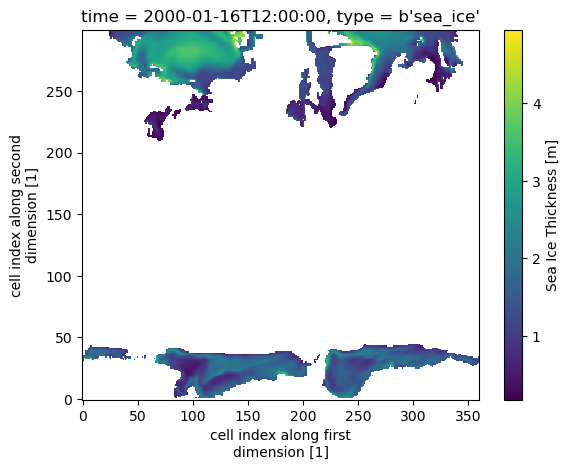

In [14]:
ds_jan2000.sithick.plot()

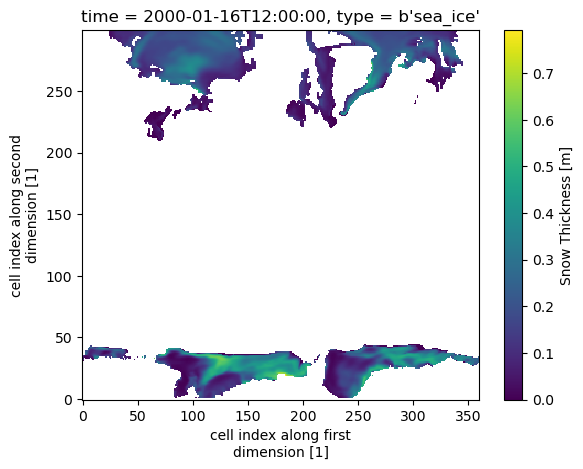

In [21]:
ds_jan2000.sisnthick.plot()

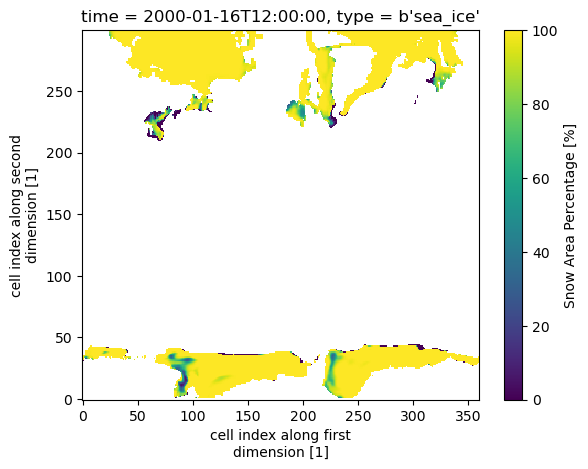

In [22]:
ds_jan2000.sisnconc.plot()

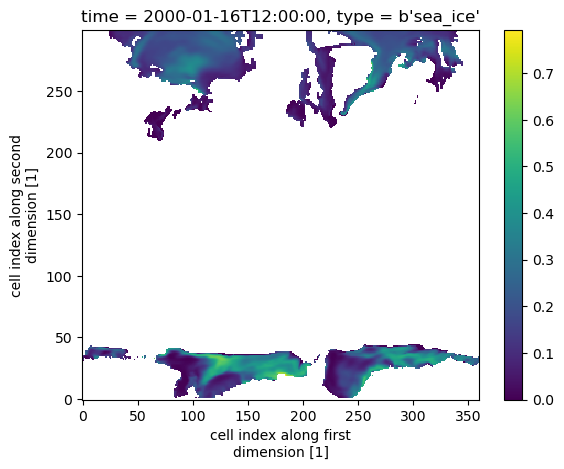

In [23]:
(ds_jan2000.sisnthick*ds_jan2000.sisnconc/100).plot()

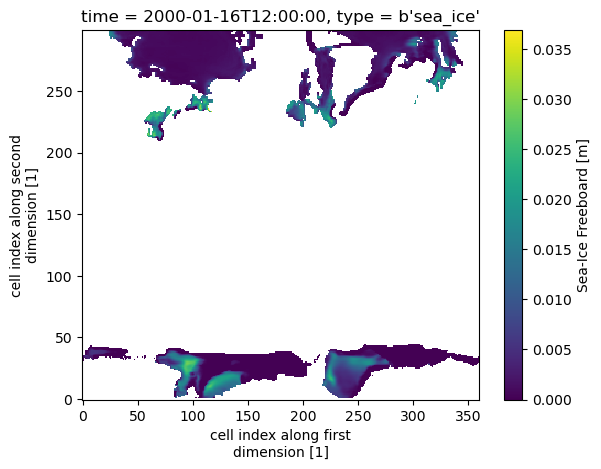

In [24]:
ds_jan2000.sifb.plot()

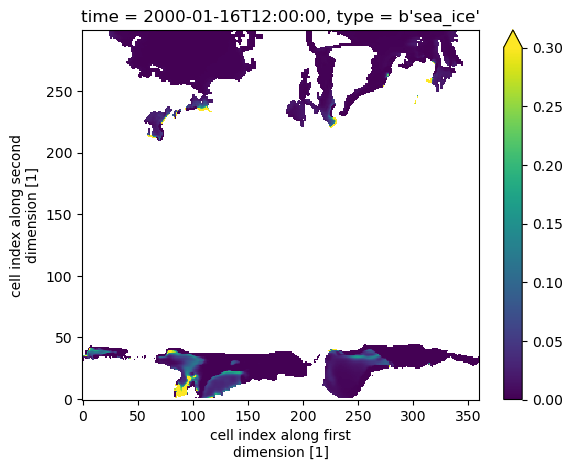

In [37]:
(ds_jan2000.sifb/(ds_jan2000.siconc/100)).plot(vmax=0.3)

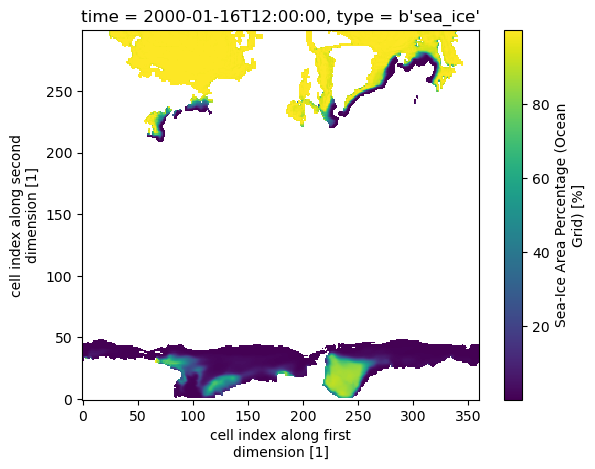

In [150]:
ds_jan2000.siconc.where(ds_jan2000.siconc>0).plot()

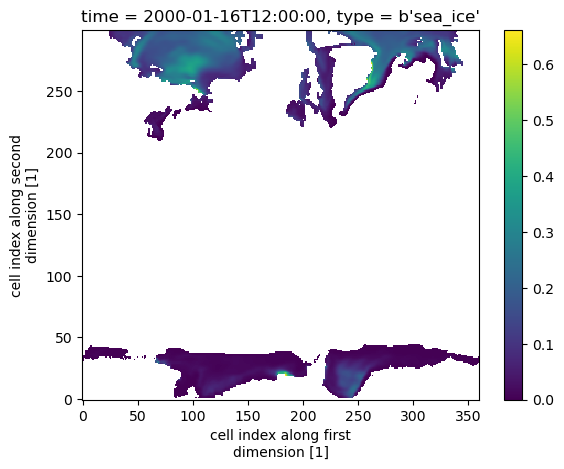

In [227]:
(ds_jan2000.siconc/100*(ds_jan2000.sifb+ds_jan2000.sisnthick*ds_jan2000.sisnconc/100)).plot()

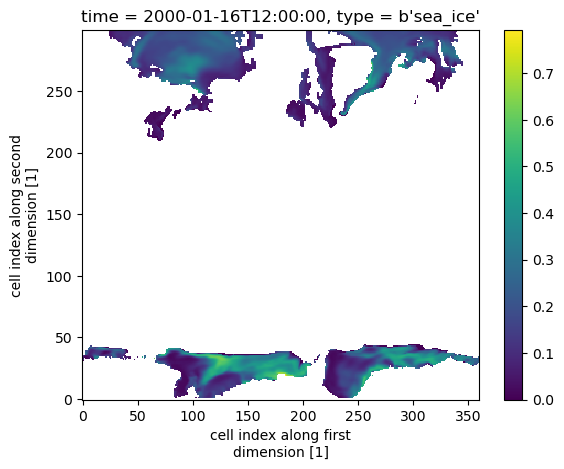

In [228]:
((ds_jan2000.sifb+ds_jan2000.sisnthick*ds_jan2000.sisnconc/100)).plot()

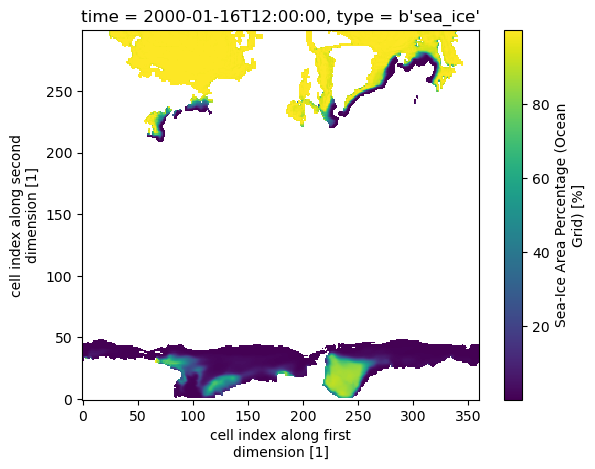

In [105]:
ds_jan2000.siconc.where(ds_jan2000.siconc>0).plot()

In [24]:
rho_w = 1026
rho_s = 300

In [25]:
rho_i_calc = (
    (ds_jan2000.sithick-ds_jan2000.sifb)*rho_w
    -ds_jan2000.sisnthick*rho_s*ds_jan2000.sisnconc/100
)/ds_jan2000.sithick

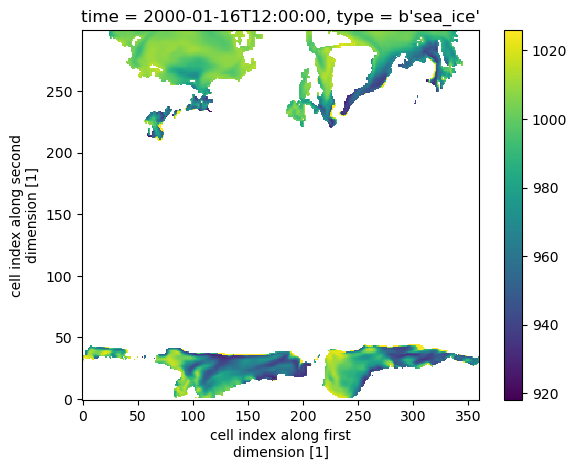

In [26]:
rho_i_calc.plot()

In [27]:
rho_i_calc.mean().values

array(986.3314, dtype=float32)

(array([  18.,  463., 1270., 1417., 1383., 1545., 2066., 4082., 3720.,
         565.]),
 array([ 918.12268066,  928.91040039,  939.69812012,  950.48590088,
         961.27362061,  972.06134033,  982.84906006,  993.63677979,
        1004.42456055, 1015.21228027, 1026.        ]),
 <BarContainer object of 10 artists>)

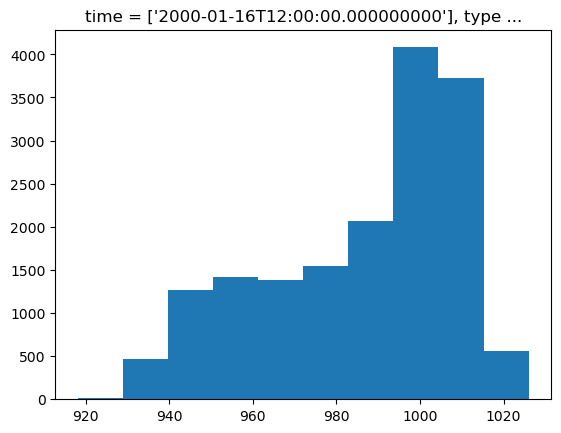

In [28]:
rho_i_calc.plot.hist()

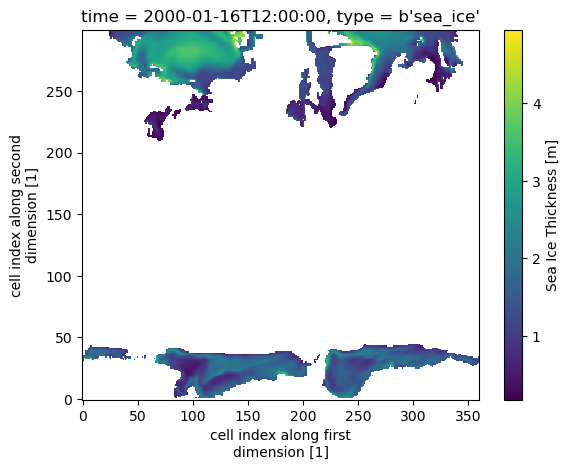

In [68]:
(ds_jan2000.sithick).plot()

In [107]:
rho_i_calc = ((
    (ds_jan2000.sithick-(ds_jan2000.sifb/ds_jan2000.siconc*100))*rho_w
    -ds_jan2000.sisnthick*rho_s#*ds_jan2000.sisnconc/100
)/ds_jan2000.sithick)#.where(ds_jan2000.siconc>0)

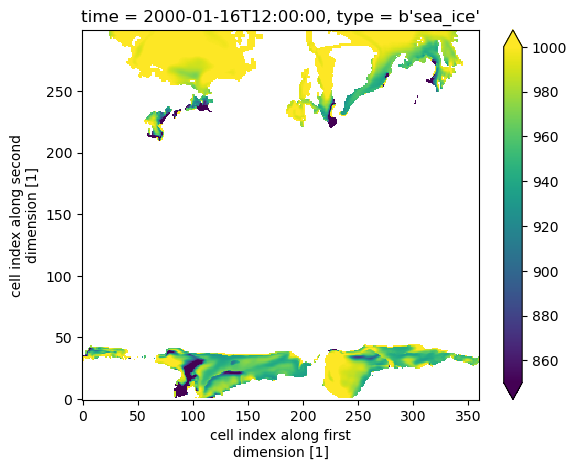

In [108]:
rho_i_calc.plot(vmin=850,vmax=1000)

In [109]:
rho_i_calc.mean().values

array(920.774, dtype=float32)

(array([1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 2.0000e+00, 6.0000e+00, 1.2000e+01, 1.6502e+04]),
 array([-71286.828125  , -64055.546875  , -56824.26171875, -49592.98046875,
        -42361.6953125 , -35130.4140625 , -27899.13085938, -20667.84765625,
        -13436.56542969,  -6205.28271484,   1026.        ]),
 <BarContainer object of 10 artists>)

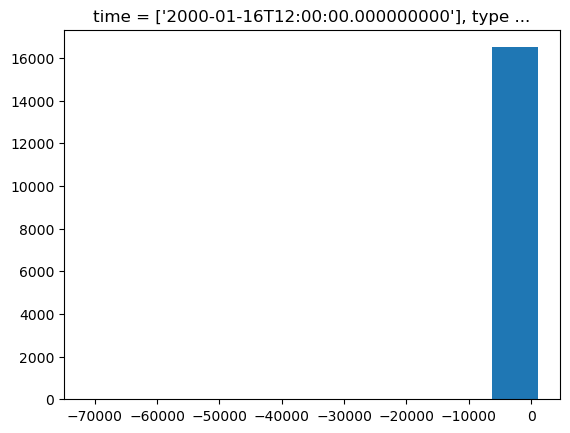

In [110]:
rho_i_calc.plot.hist()

In [38]:
rho_i_calc = (
    (ds_jan2000.sithick-(ds_jan2000.sifb/ds_jan2000.siconc*100))*rho_w
    -ds_jan2000.sisnthick*rho_s*ds_jan2000.sisnconc/100
)/ds_jan2000.sithick

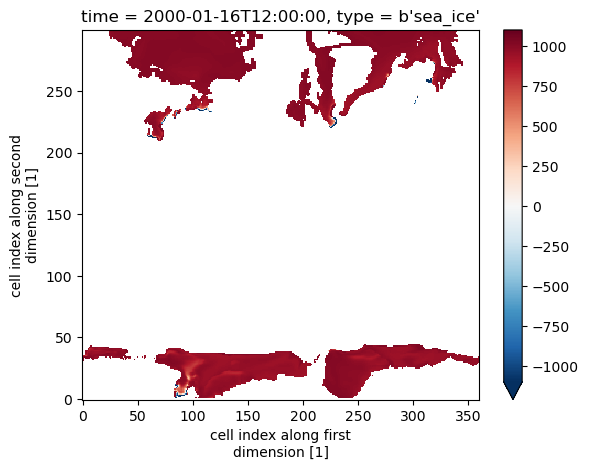

In [39]:
rho_i_calc.plot(vmax=1100)

In [40]:
rho_i_calc.where(rho_i_calc>0).mean().values

array(974.573, dtype=float32)

In [44]:
rho_i=917

In [45]:
sifb_calc = (ds_jan2000.sithick*(rho_w-rho_i)-ds_jan2000.sisnthick*rho_s)/rho_w

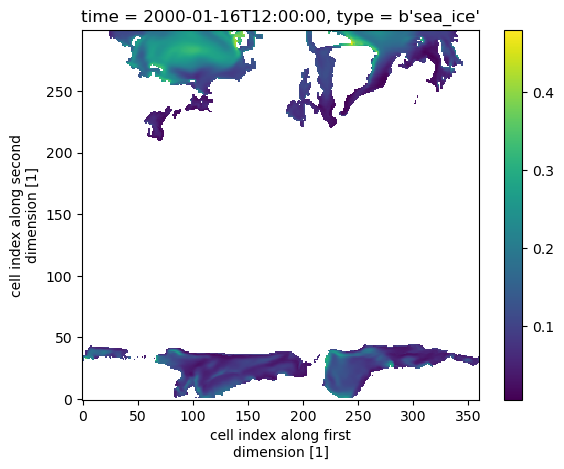

In [46]:
sifb_calc.plot()

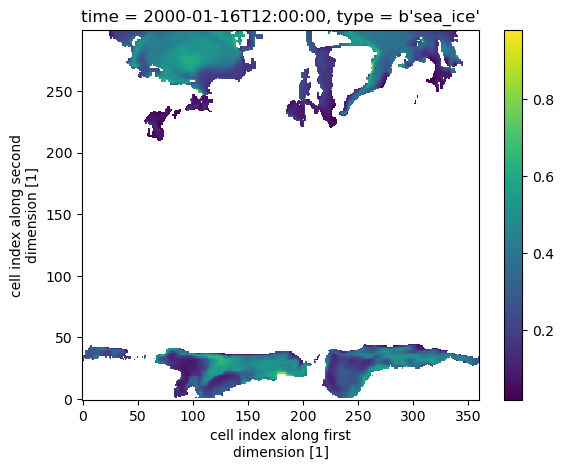

In [47]:
(sifb_calc+ds_jan2000.sisnthick).plot()

In [199]:
sifb_calc = (ds_jan2000.sithick*(rho_w-rho_i)-ds_jan2000.sisnthick*rho_s)/rho_w

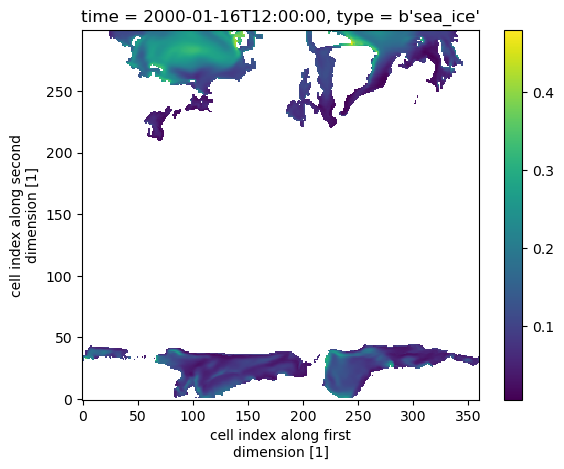

In [235]:
sifb_calc.plot()

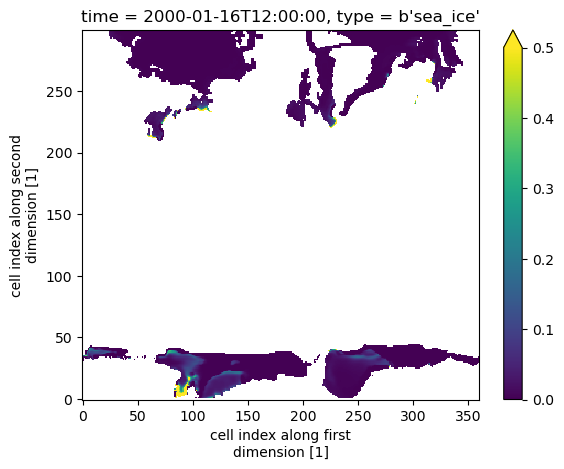

In [241]:
(ds_jan2000.sifb/(ds_jan2000.siconc/100)).plot(vmax=0.5)

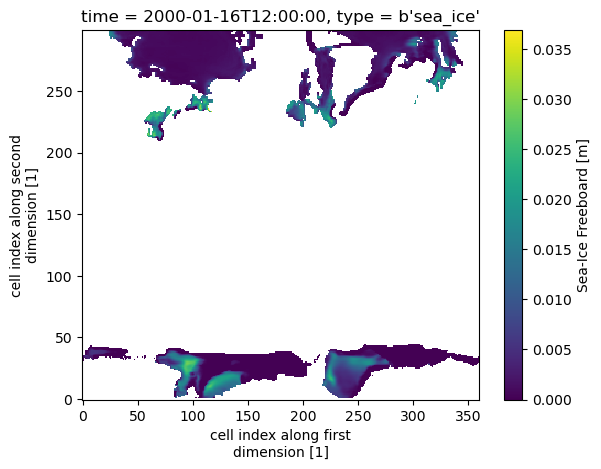

In [234]:
ds_jan2000.sifb.plot()

In [209]:
rho_i_calc_calc = (
    (ds_jan2000.sithick-sifb_calc)*rho_w
    -ds_jan2000.sisnthick*rho_s
)/ds_jan2000.sithick

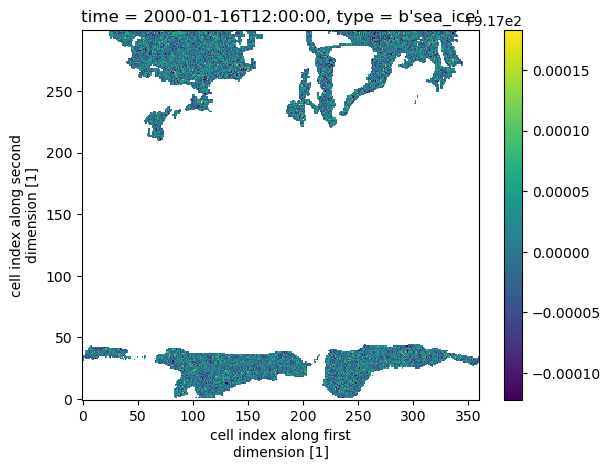

In [210]:
rho_i_calc_calc.plot()

In [211]:
rho_i_calc_calc.mean().values

array(917., dtype=float32)

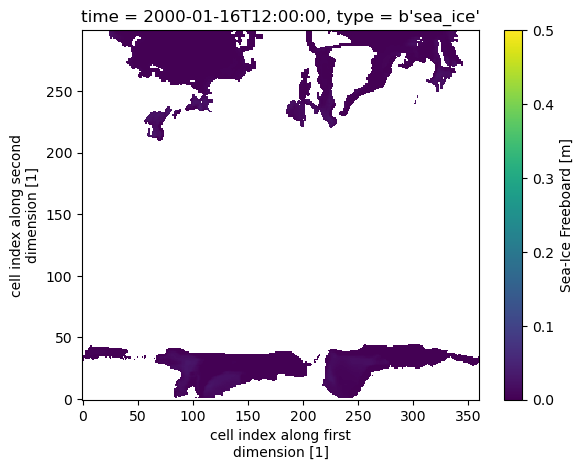

In [201]:
(ds_jan2000.sifb).plot(vmax=0.5)

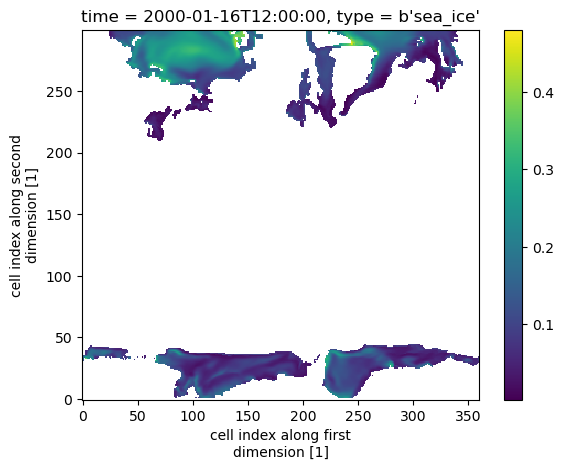

In [129]:
(sifb_calc-ds_jan2000.sifb*ds_jan2000.siconc/100).plot()

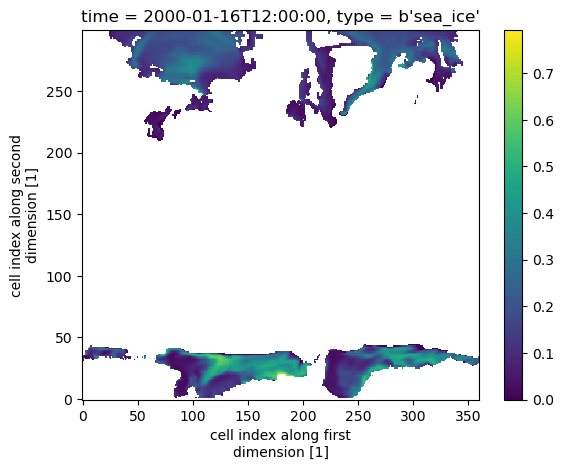

In [114]:
(ds_jan2000.sifb+ds_jan2000.sisnthick).plot()

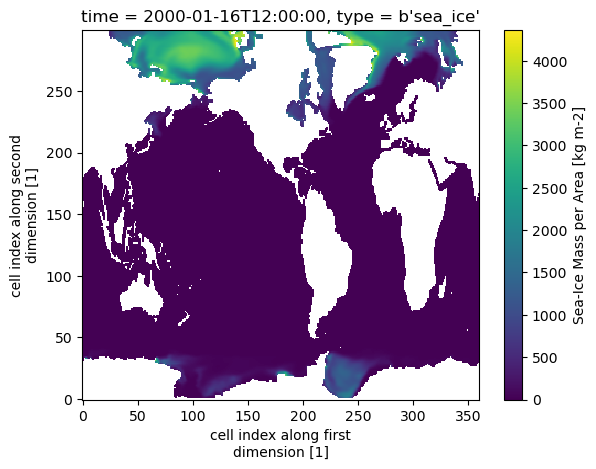

In [117]:
ds_jan2000.simass.plot()

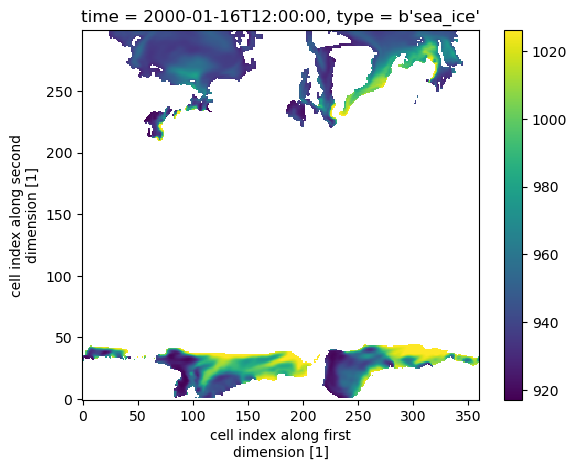

In [246]:
rho_i_calc2 = (ds_jan2000.simass/(ds_jan2000.sithick*ds_jan2000.siconc/100))

rho_i_calc2.plot()

In [247]:
rho_i_calc2.mean().values

array(958.9991, dtype=float32)

(array([1177., 3535., 4358., 1790., 1050.,  762., 1009.,  860.,  801.,
        1187.]),
 array([ 917.10131836,  928.0177002 ,  938.93408203,  949.85040283,
         960.76678467,  971.6831665 ,  982.59954834,  993.51593018,
        1004.43225098, 1015.34863281, 1026.26501465]),
 <BarContainer object of 10 artists>)

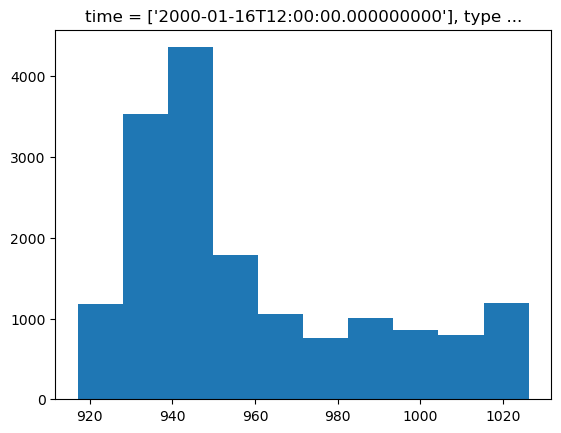

In [248]:
rho_i_calc2.plot.hist()

In [256]:
sifb_calc = (ds_jan2000.sithick*(rho_w-rho_i_calc2)-ds_jan2000.sisnthick*rho_s)/rho_w

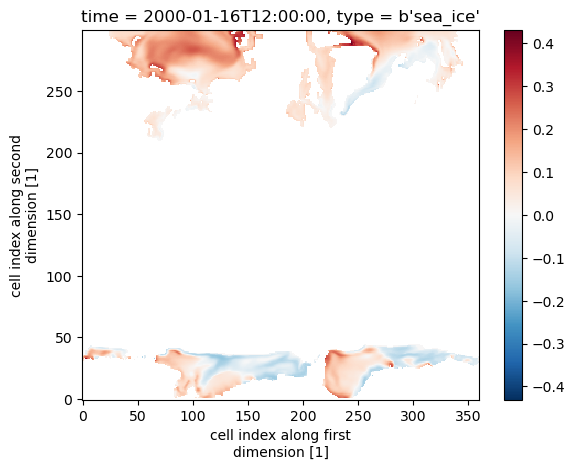

In [257]:
sifb_calc.plot()

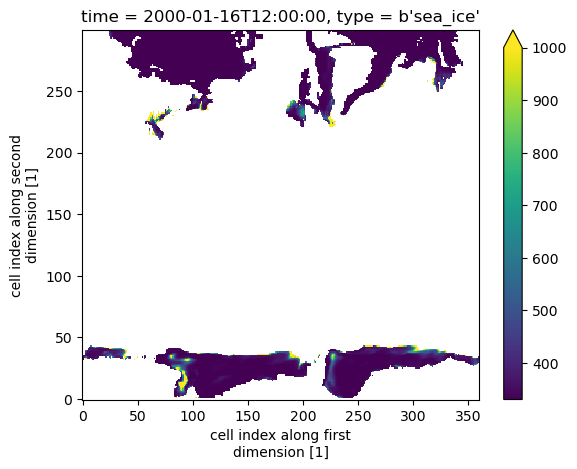

In [255]:
rho_s_calc2 = ds_jan2000.sisnmass/(ds_jan2000.sisnthick*ds_jan2000.siconc/100*ds_jan2000.sisnconc/100)

rho_s_calc2.plot(vmax=1000)

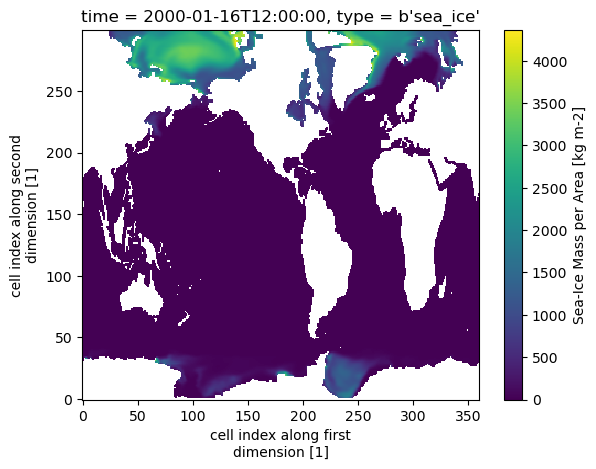

In [124]:
(ds_jan2000.simass).plot()

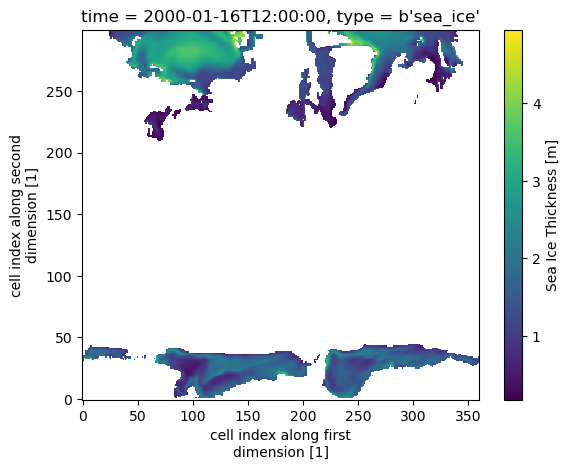

In [125]:
(ds_jan2000.sithick).plot()

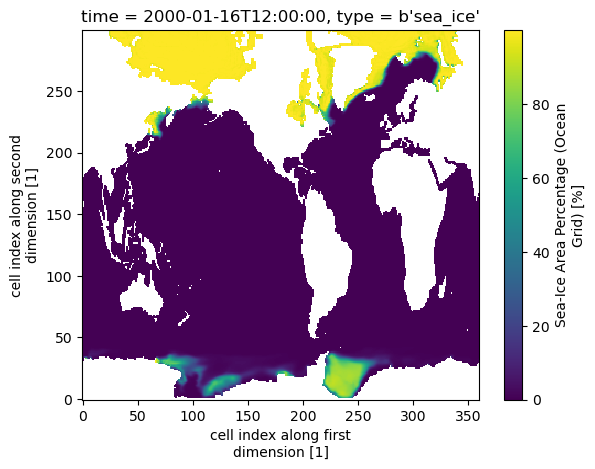

In [126]:
(ds_jan2000.siconc).plot()